In [1]:
import pandas as pd

In [44]:
df = pd.read_csv('bhp.csv')
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [45]:
df.shape

(13200, 7)

In [46]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [49]:
df.price_per_sqft.quantile(0.001)

1366.184

In [50]:
df.price_per_sqft.quantile(0.999)

50959.36200000098

In [51]:
df = df[(df.price_per_sqft > 1366.184) & (df.price_per_sqft < 50959.362)]

In [53]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [54]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [57]:
df.price_per_sqft.quantile(0.99)

22973.019999999964

In [58]:
df.price_per_sqft.quantile(0.01)

2550.0

In [59]:
df = df[(df.price_per_sqft > 2550.0) & (df.price_per_sqft < 22973.01)]

In [60]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000
mean,1530.401967,2.672510,106.544283,2.781337,6487.391095
std,941.591002,1.260603,118.790393,1.206368,3458.781301
min,250.000000,1.000000,8.000000,1.000000,2551.000000
25%,1100.000000,2.000000,50.000000,2.000000,4289.750000
50%,1275.000000,2.000000,71.525000,3.000000,5441.500000
75%,1665.000000,3.000000,119.000000,3.000000,7250.250000
max,30400.000000,27.000000,2340.000000,27.000000,22962.000000


In [23]:
import seaborn as sb

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

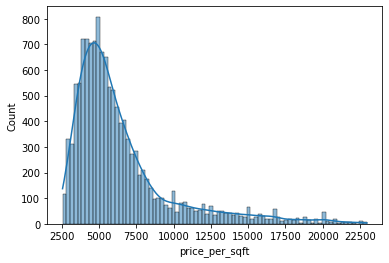

In [61]:
sb.histplot(df.price_per_sqft, kde=True)

In [26]:
mean = df.price_per_sqft.mean()

In [27]:
mean

7920.336742424242

In [28]:
std = df.price_per_sqft.std()

In [29]:
std

106727.16032810845

In [32]:
mean + 4 * std

434828.97805485805

In [33]:
mean - 4 * std

-418988.3045700096

In [35]:
df[(df['price_per_sqft'] > 434828.97) | (df['price_per_sqft'] < -418988.30)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [40]:
df_no_outliers = df[(df['price_per_sqft'] < 434828.97) & (df['price_per_sqft'] > -418988.30)]

In [41]:
df_no_outliers.shape

(13196, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

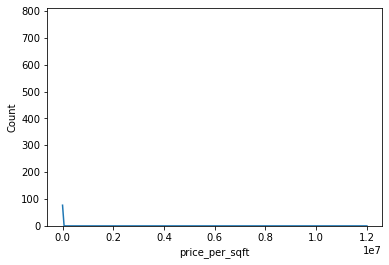

In [42]:
sb.histplot(df.price_per_sqft, kde=True)

In [6]:
mean_total_sqft = df.total_sqft.mean()

In [17]:
mean_total_sqft

1555.3027829545451

In [7]:
std_total_sqft = df.total_sqft.std()

In [18]:
std_total_sqft

1237.3234454015123

In [8]:
min_total_sqft = mean_total_sqft - 3 * std_total_sqft

In [19]:
min_total_sqft

-2156.667553249992

In [9]:
max_total_sqft = mean_total_sqft + 3 * std_total_sqft

In [15]:
df.total_sqft = df.total_sqft[(df.total_sqft > min_total_sqft) | (df.total_sqft < max_total_sqft)]

In [16]:
df.shape

(13200, 7)

In [12]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [62]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [63]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

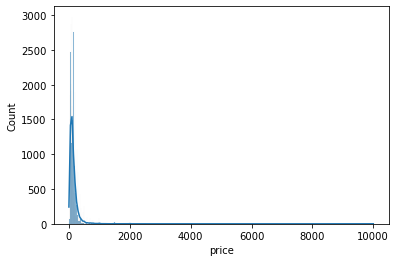

In [64]:
sb.histplot(df.price, kde=True)

In [65]:
df.price.quantile(0.9)

269.0

In [66]:
df = df[df.price < df.price.quantile(0.95)]

In [67]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.644400e+04,4.644400e+04,46444.000000,46444.000000,46444.000000,46444.000000,46444.000000,37258.000000,46444.000000,46444.000000
mean,1.891914e+07,6.645192e+07,40.728569,-73.950966,122.533718,6.944621,23.828094,1.377517,6.686246,109.685363
std,1.093003e+07,7.768290e+07,0.055187,0.046383,71.914437,19.875650,45.187622,1.690514,31.130857,130.410784
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.446903e+06,7.720976e+06,40.689360,-73.982092,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.954714e+07,3.034298e+07,40.722005,-73.954570,100.000000,2.000000,5.000000,0.710000,1.000000,40.000000
75%,2.893755e+07,1.056405e+08,40.763330,-73.934610,160.000000,5.000000,24.000000,2.020000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,353.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

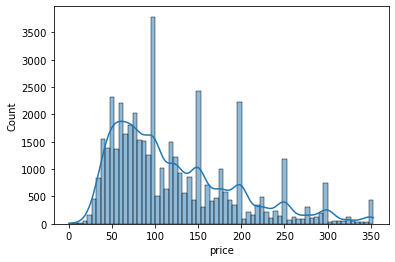

In [68]:
sb.histplot(df.price, kde=True)

In [70]:
mean = df.price.mean()
mean

122.53371802600982

In [72]:
std = df.price.std()
std

71.91443725958851

In [73]:
max_price = mean + 3 * std
max_price

338.27702980477534

In [74]:
min_price = mean - 3 * std
min_price

-93.20959375275571

In [75]:
df = df[(df.price > min_price) & (df.price < max_price)]

In [76]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.593500e+04,4.593500e+04,45935.000000,45935.000000,45935.000000,45935.000000,45935.000000,36918.000000,45935.000000,45935.000000
mean,1.890015e+07,6.633342e+07,40.728492,-73.950739,120.026668,6.938783,23.938892,1.378402,6.645934,109.411386
std,1.091941e+07,7.756400e+07,0.055328,0.046467,68.230351,19.856106,45.310672,1.692064,31.026613,130.289752
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.437330e+06,7.724081e+06,40.689240,-73.981930,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952675e+07,3.028391e+07,40.721780,-73.954370,100.000000,2.000000,5.000000,0.715000,1.000000,39.000000
75%,2.891307e+07,1.055096e+08,40.763390,-73.934325,159.000000,5.000000,24.000000,2.020000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,338.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

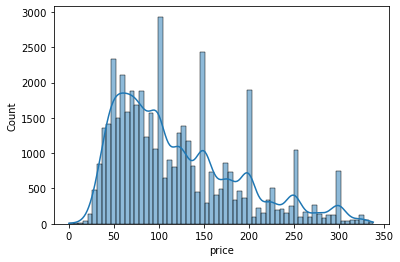

In [77]:
sb.histplot(df.price, kde=True)

In [81]:
df_50 = df[df.price <= df.price.quantile(0.50)]

In [82]:
df_50.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.392800e+04,2.392800e+04,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,19399.000000,23928.000000,23928.000000
mean,1.939765e+07,7.110112e+07,40.725603,-73.938165,67.855316,6.232865,24.388081,1.457142,3.167628,104.961886
std,1.058748e+07,7.801312e+07,0.062020,0.049858,20.868435,18.469161,46.745099,1.829275,10.653717,129.452706
min,3.831000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.013868e+07,9.910192e+06,40.684760,-73.961390,50.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,2.002918e+07,3.663705e+07,40.711765,-73.944460,68.000000,2.000000,6.000000,0.770000,1.000000,35.000000
75%,2.891247e+07,1.176372e+08,40.764960,-73.920848,85.000000,5.000000,25.000000,2.130000,2.000000,192.000000
max,3.648724e+07,2.742985e+08,40.913060,-73.712990,100.000000,999.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

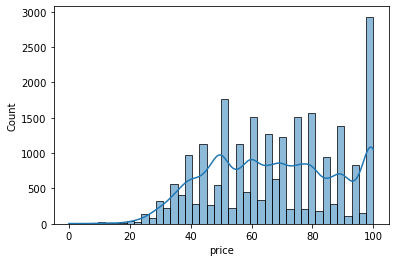

In [83]:
sb.histplot(df_50.price, kde=True)

In [86]:
mean = df_50.price.mean()
mean

67.85531594784354

In [87]:
std = df_50.price.std()
std

20.868435084839117

In [89]:
max_price = mean + 3 * std
min_price = mean - 3 * std
max_price, min_price


(130.46062120236087, 5.250010693326189)

In [90]:
df_50 = df_50[(df_50.price >= min_price) & (df_50.price <= max_price)]

<AxesSubplot:xlabel='price', ylabel='Count'>

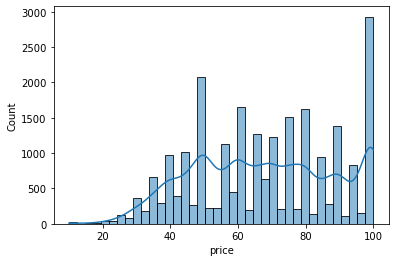

In [91]:
sb.histplot(df_50.price, kde=True)

In [92]:
df_25 = df[df.price <= df.price.quantile(0.25)]

In [93]:
df_25.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.164500e+04,1.164500e+04,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000,9377.000000,11645.000000,11645.000000
mean,2.032329e+07,7.894997e+07,40.721993,-73.929441,49.592615,6.653671,22.347531,1.461052,3.978016,108.919966
std,1.018940e+07,7.942779e+07,0.064539,0.051729,10.821851,15.909861,45.243092,1.830614,10.699072,131.877399
min,5.121000e+03,2.787000e+03,40.542680,-74.173880,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.234562e+07,1.366778e+07,40.682140,-73.954700,42.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,2.102389e+07,4.541663e+07,40.702850,-73.938280,50.000000,2.000000,5.000000,0.770000,1.000000,37.000000
75%,2.945728e+07,1.358403e+08,40.761240,-73.912450,60.000000,5.000000,23.000000,2.100000,3.000000,216.000000
max,3.648561e+07,2.742985e+08,40.913060,-73.712990,65.000000,500.000000,629.000000,20.940000,103.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

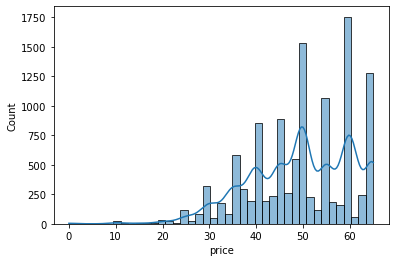

In [94]:
sb.histplot(df_25.price, kde=True)